#Image Analysis

**Module Import**
- PIL (Python Image Library)
- Numpy
- Matplotlib

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load Image Files**

In [2]:
img_01 = Image.open('1LGEG-CTRL-20h-MDM-MMP-9-good2-merge_C002.tif')
img_02 = Image.open('2LGEG-TB-20h-MDM-MMP-9-good2-merge_C002.tif')
img_03 = Image.open('3HGEG-CTRL-20h-MDM-MMP-9-good2-merge_C002.tif')
img_04 = Image.open('4HGEG-TB-20h-MDM-MMP-9-good2-merge_C002.tif')
img_05 = Image.open('5LGW-CTRL-20h-MDM-MMP-9-good2-merge_C002.tif')
img_06 = Image.open('6LGW-TB-20h-MDM-MMP-9-good-merge_C002.tif')
img_07 = Image.open('7HGW-CTRL-20h-MDM-MMP-9-good1-merge_C002.tif')
img_08 = Image.open('8HGW-TB-20h-MDM-MMP-9-2-merge_C002.tif')
img_09 = Image.open('9LGYL-CTRL-20h-MDM-MMP-9-good1-merge_C002.tif')
img_10 = Image.open('10LGYL-TB-20h-MDM-MMP-9-good2-merge_C002.tif')
img_11 = Image.open('11HGYL-CTRL-20h-MDM-MMP-9-good1-merge_C002.tif')
img_12 = Image.open('12HGYL-TB-20h-MDM-MMP-9-good2-merge_C002.tif')

**Helper Functions**

**1. Function: Image Data Extraction**
- matrix: RGB tuples according to the coordinates
- integrated density: sum of green channel values
- points: list of green channel values

In [3]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    points = []
    integrated_density = 0

    for i in range(x):
        matrix.append([])
        for j in range(y):
            matrix[i].append(image.getpixel((j,i)))
            integrated_density += image.getpixel((i,j))[1]
            points.append(image.getpixel((i,j))[1])
    return matrix, integrated_density, points

**2. Function: Histogram**

In [4]:
def creatHistogram(points_list):
    max_value = max(points_list)
    histo = [0] * (max_value + 1)
    for point in points_list:
        histo[point] +=1        
    return histo

**Execution**

**Analysing Images**

In [18]:
matrix_01, integrated_density_01, points_01= extractData(img_01)
matrix_02, integrated_density_02, points_02= extractData(img_02)
matrix_03, integrated_density_03, points_03= extractData(img_03)
matrix_04, integrated_density_04, points_04= extractData(img_04)
matrix_05, integrated_density_05, points_05= extractData(img_05)
matrix_06, integrated_density_06, points_06= extractData(img_06)
matrix_07, integrated_density_07, points_07= extractData(img_07)
matrix_08, integrated_density_08, points_08= extractData(img_08)
matrix_09, integrated_density_09, points_09= extractData(img_09)
matrix_10, integrated_density_10, points_10= extractData(img_10)
matrix_11, integrated_density_11, points_11= extractData(img_11)
matrix_12, integrated_density_12, points_12= extractData(img_12)

**Histogram Ploting**

In [20]:
def histoPlot(points):
    h = creatHistogram(points)
    plt.bar(range(len(h)), h, color = 'green')

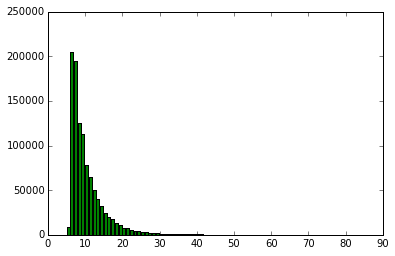

In [28]:
histoPlot(points_05)

In [7]:
def distinguish(matrix):    
    matrix_distinguished = matrix[:]
    for i in range(1024):
        for j in range(1024):
            dark_index = 0
            if matrix[i][j][1]<16:
                if i>3 and i<1024-3 and j>3 and j<1024-3:
                    around = [matrix[x][y] for x in range(i-3, i+4) for y in range(j-3, j+4)]
                    around.remove(matrix[i][j])
                    for a in around:
                        if a[1]<9:
                            dark_index +=1
                    if dark_index >8:
                        matrix_distinguished[i][j] = (255,0,0)
                else:
                    matrix_distinguished[i][j] = (255,0,0)
    return matrix_distinguished

In [29]:
matrix_01d = distinguish(matrix_01)
matrix_02d = distinguish(matrix_02)
matrix_03d = distinguish(matrix_03)
matrix_04d = distinguish(matrix_04)
matrix_05d = distinguish(matrix_05)
matrix_06d = distinguish(matrix_06)
matrix_07d = distinguish(matrix_07)
matrix_08d = distinguish(matrix_08)
matrix_09d = distinguish(matrix_09)
matrix_10d = distinguish(matrix_10)
matrix_11d = distinguish(matrix_11)
matrix_12d = distinguish(matrix_12)

In [32]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

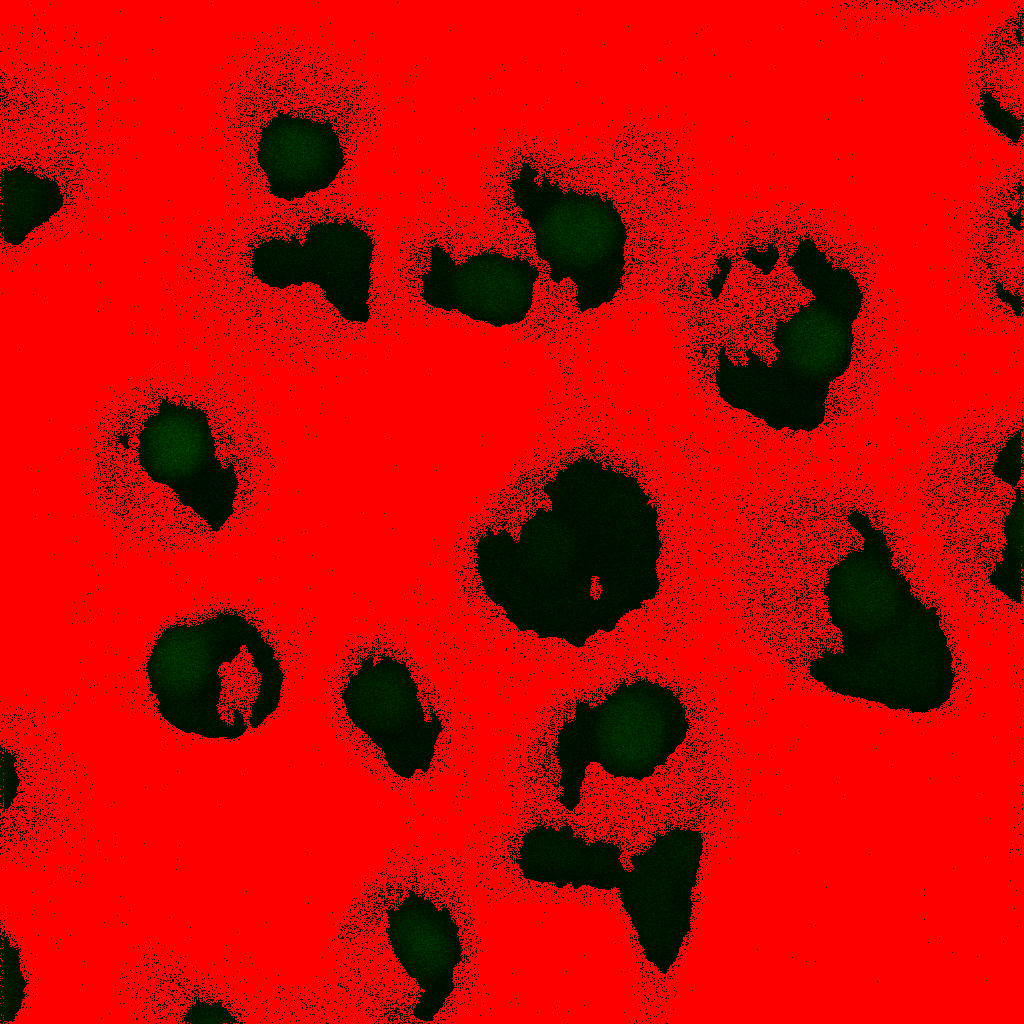

In [79]:
img_11d = imageReconstruct(matrix_11d)
img_11d

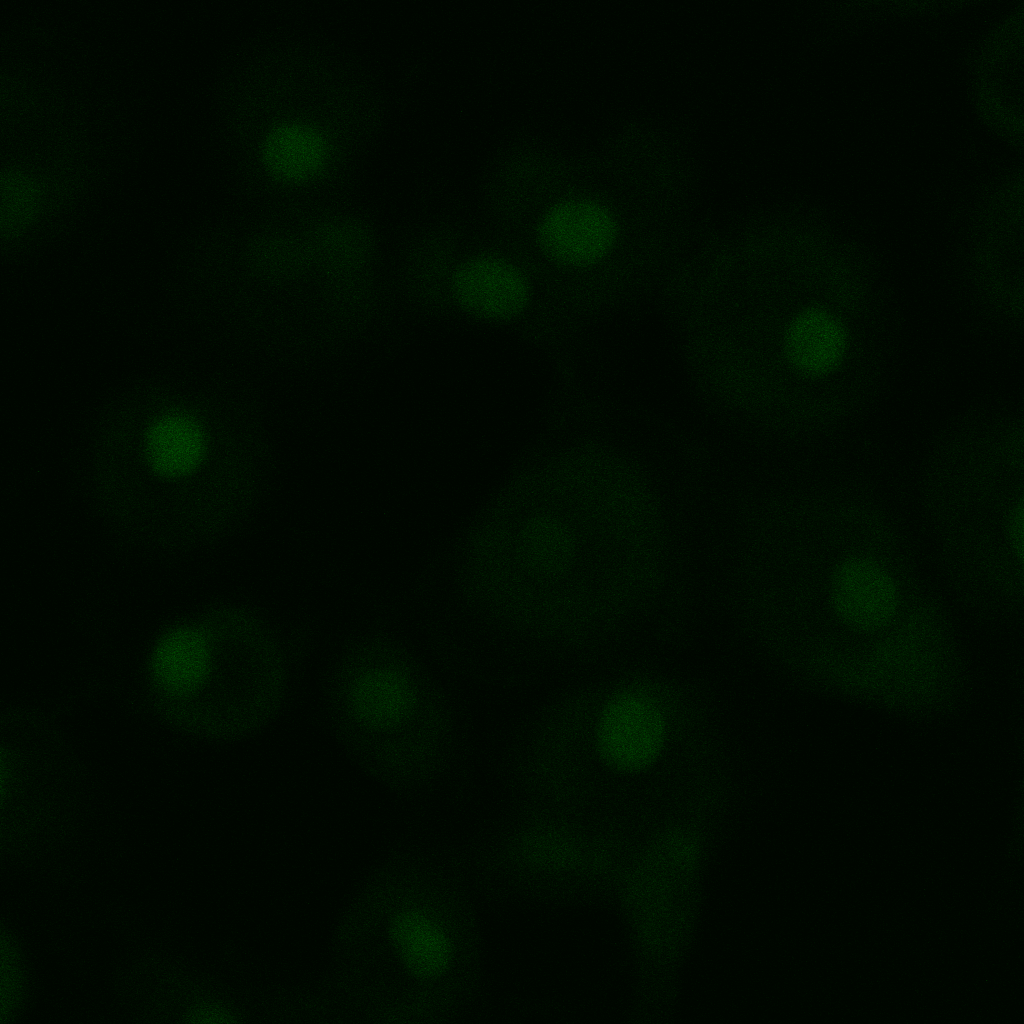

In [80]:
img_11

In [13]:
def calculateDensity(matrix, matrix_d):
    interested_integrated_density = 0
    background_integrated_density = 0
    interested_area = 0
    background_area = 0
    for i in range(1024):
        for j in range(1024):
            if matrix_d[i][j][0] != 255:
                interested_integrated_density += matrix[i][j][1]
                interested_area += 1
            else:
                background_integrated_density += matrix[i][j][1]
                background_area +=1
    interested_mean = interested_integrated_density / interested_area
    background_mean = background_integrated_density / background_area
    return interested_mean - background_mean

In [81]:
density_11 = calculateDensity(matrix_11, matrix_11d)

In [82]:
density_11

20.182654853363946

Density 01: 19.115678840783065
Density 02: 21.03849193650055
Density 03: 19.4021602053382
Density 04: 24.327005268892535
Density 05: 19.331643072963296
Density 06: 22.63597005452447
Density 07: 18.695367817359656
Density 08: 23.3845780012593
Density 09: 17.905410621803327
Density 10: 23.891008887529075
Density 11: 20.182654853363946
Density 12: 20.997015336663694